In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [91]:
# Reading the training data
training_data = pd.read_csv('D:/AI_Cases/Credit_Card_Risk/cs-training.csv')

training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [4]:
#Cleaning the columns means replacing '-' and UpperCase to lowercase
clean_columns = []

for i in range(len(training_data.columns)):
    clean_columns.append(training_data.columns[i].replace('-','').lower())
training_data.columns = clean_columns


In [5]:
training_data.head()

,unnamed: 0,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
#drop the column which unnamed
training_data.drop('unnamed: 0',axis = 1,inplace = True)

In [7]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
#checking any columns has missing values
training_data.isnull().sum();

In [9]:
#find the missing percentage in each column

for column in training_data.columns:
    data = (training_data[column].isnull().sum()/len(training_data[column]))*100;
    print("{} has {} percentage of missing data to total data".format(column,data))
    

seriousdlqin2yrs has 0.0 percentage of missing data to total data
revolvingutilizationofunsecuredlines has 0.0 percentage of missing data to total data
age has 0.0 percentage of missing data to total data
numberoftime3059dayspastduenotworse has 0.0 percentage of missing data to total data
debtratio has 0.0 percentage of missing data to total data
monthlyincome has 19.820666666666668 percentage of missing data to total data
numberofopencreditlinesandloans has 0.0 percentage of missing data to total data
numberoftimes90dayslate has 0.0 percentage of missing data to total data
numberrealestateloansorlines has 0.0 percentage of missing data to total data
numberoftime6089dayspastduenotworse has 0.0 percentage of missing data to total data
numberofdependents has 2.616 percentage of missing data to total data


In [10]:
#describe the total data of columns
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
#checking median of each column
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [12]:
#here we are going to see percentage of target variable 

print(training_data['seriousdlqin2yrs'].value_counts()/len(training_data['seriousdlqin2yrs']))

0    0.93316
1    0.06684
Name: seriousdlqin2yrs, dtype: float64


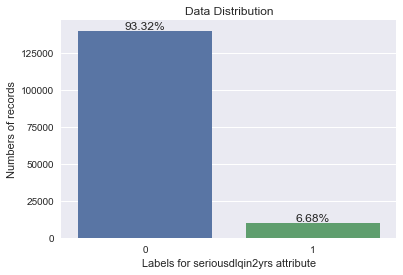

In [13]:

# Graphical representation of the target label percentage.
sb.set()
sb.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/len(training_data['seriousdlqin2yrs']))),
            fontsize=12, ha='center', va='bottom')
sb.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

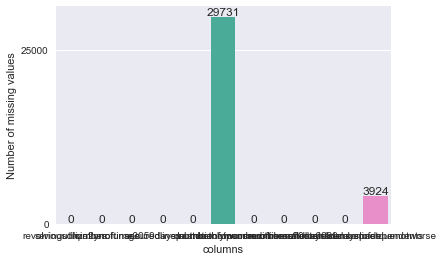

In [14]:

# Graphical representation of the target label percentage.
sb.set()
sb.barplot(training_data.columns,training_data.isnull().sum())
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
sb.set(font_scale=15)
ax.set_xlabel("columns")
ax.set_ylabel("Number of missing values")
plt.show()

In [15]:
#fill the missing data with median
full_data = training_data.fillna(training_data.median())

In [16]:
full_data.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

# Checking Corelation

In [17]:
full_data[full_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


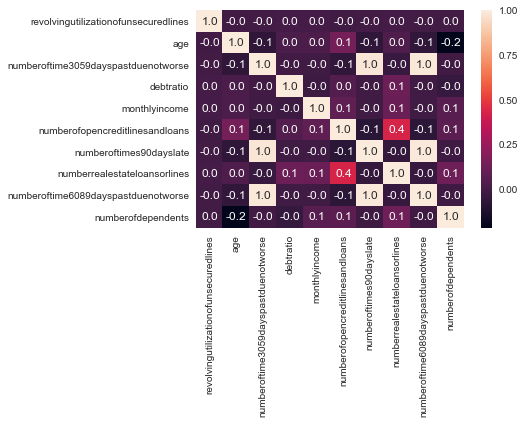

In [18]:
sb.set()
sb.heatmap(full_data[full_data.columns[1:]].corr(),annot = True,fmt = ".1f")

# Outliers

In [24]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [25]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [26]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [27]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = tuple(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
#outlierVote(data=training_data.age)

In [28]:

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    li = tuple(zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]))
    for ax, func in li:
        sb.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

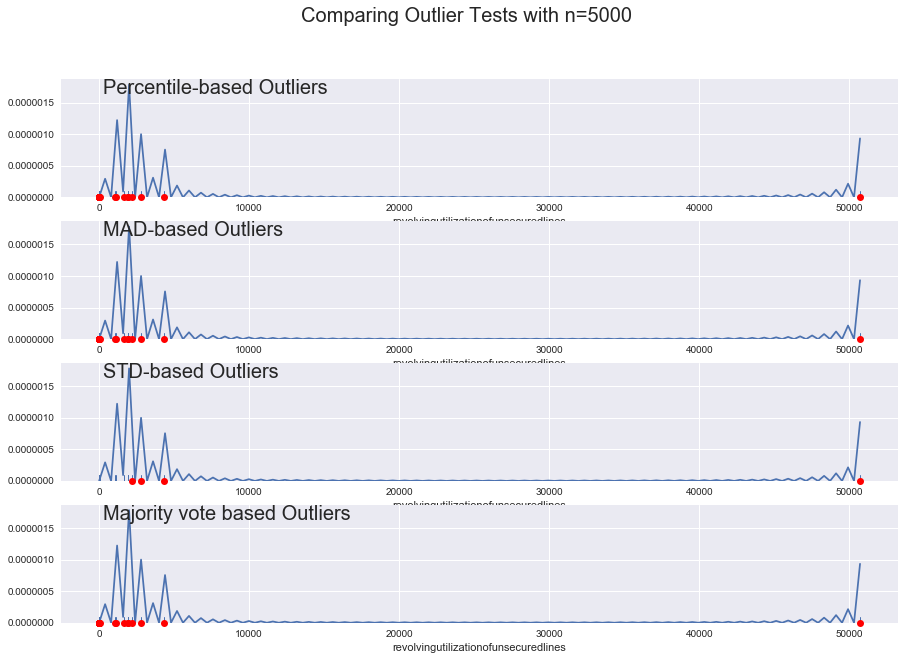

In [40]:
plotOutlier(full_data.revolvingutilizationofunsecuredlines.sample(5000))

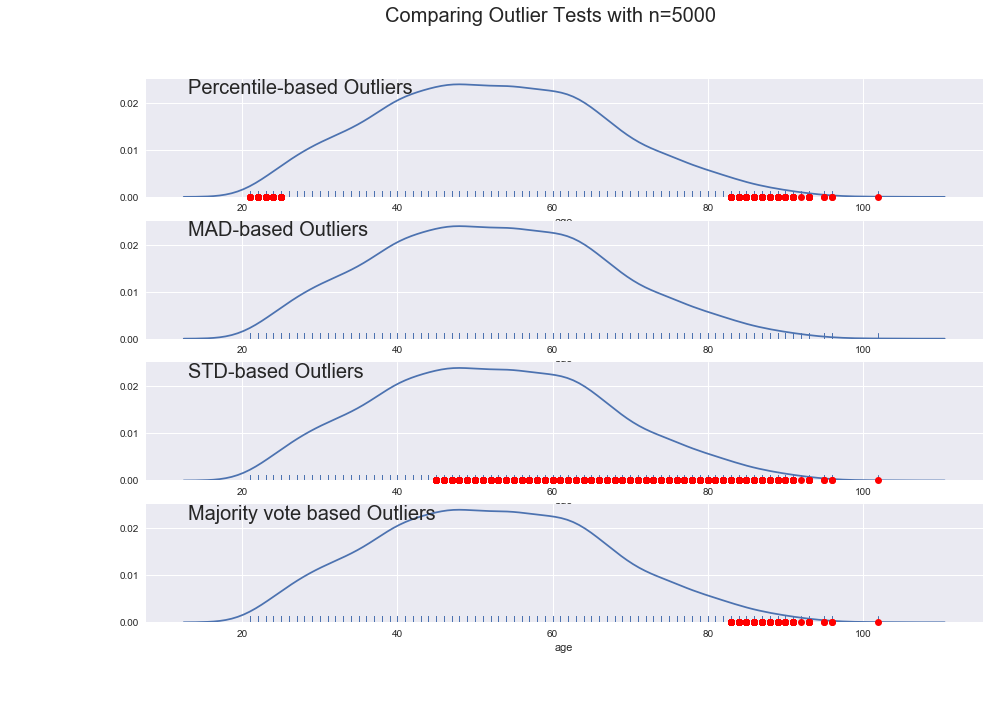

In [59]:
plotOutlier(full_data.age.sample(5000))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


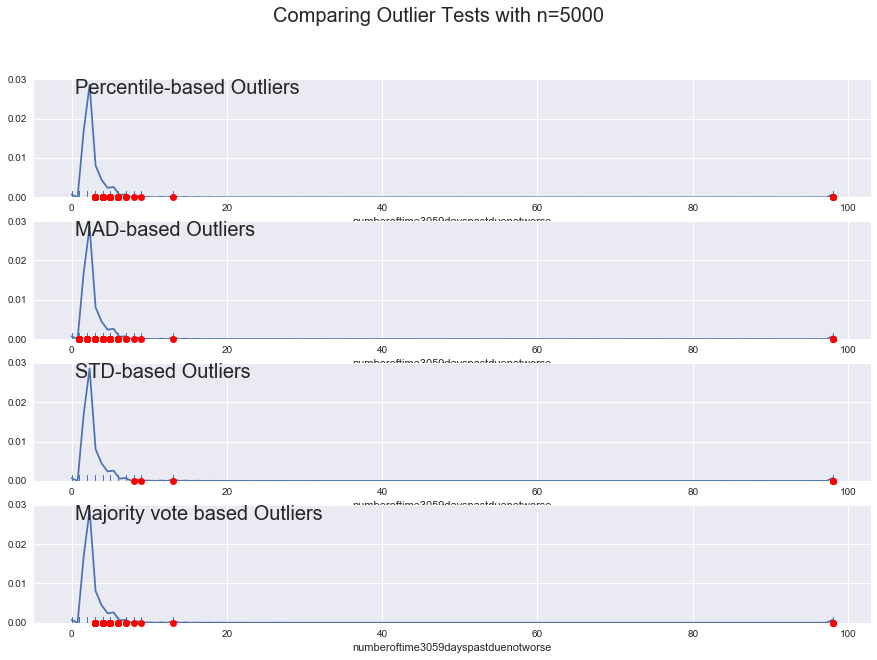

In [62]:
plotOutlier(full_data.numberoftime3059dayspastduenotworse.sample(5000))    

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


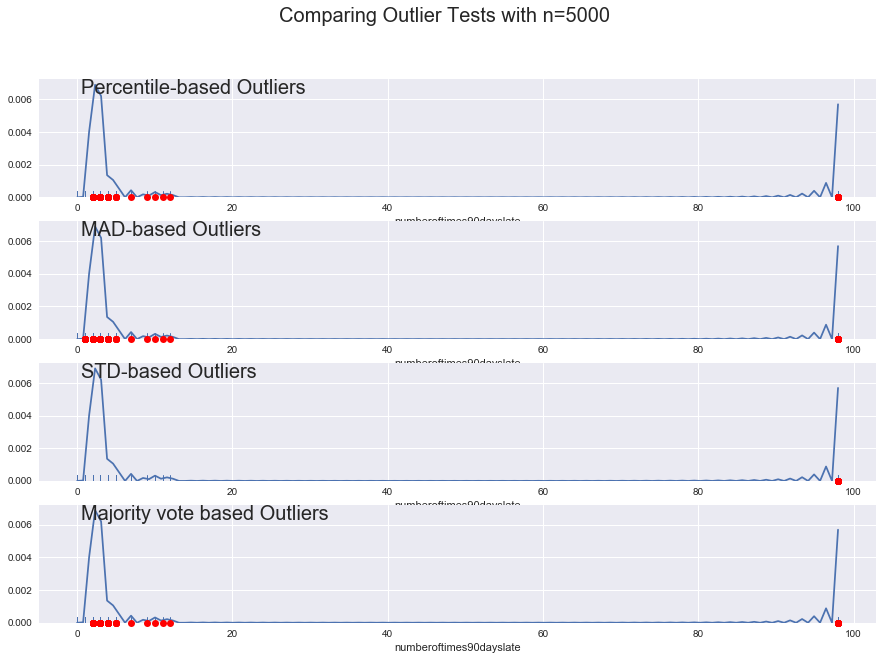

In [63]:
plotOutlier(full_data.numberoftimes90dayslate.sample(5000))                

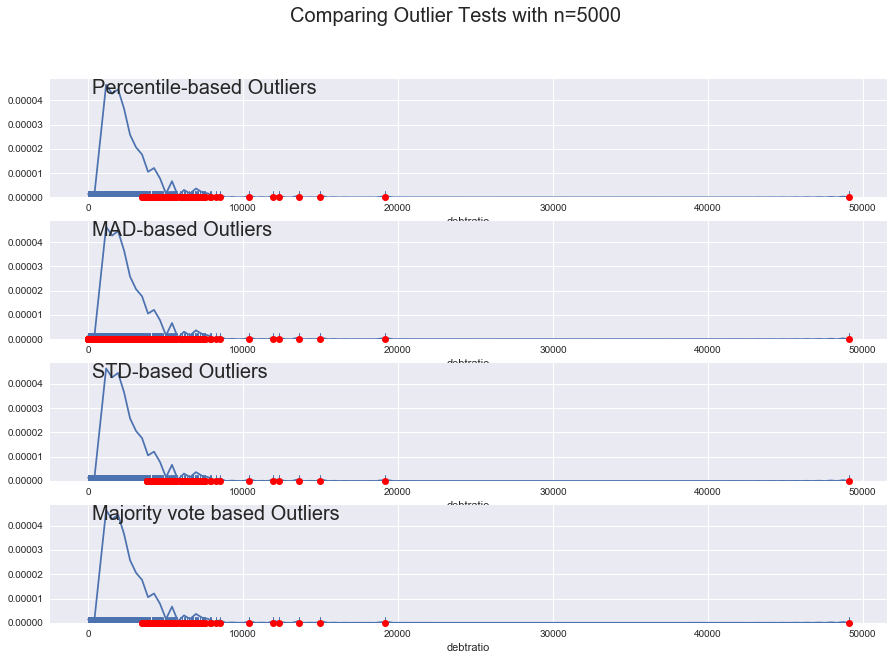

In [64]:
plotOutlier(full_data.debtratio.sample(5000))                

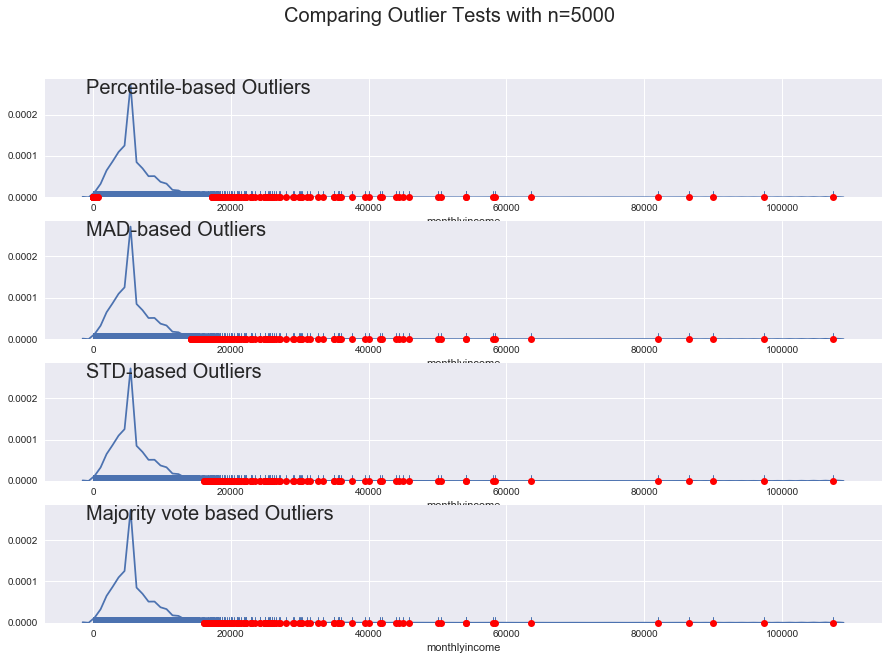

In [65]:
plotOutlier(full_data.monthlyincome.sample(5000))                

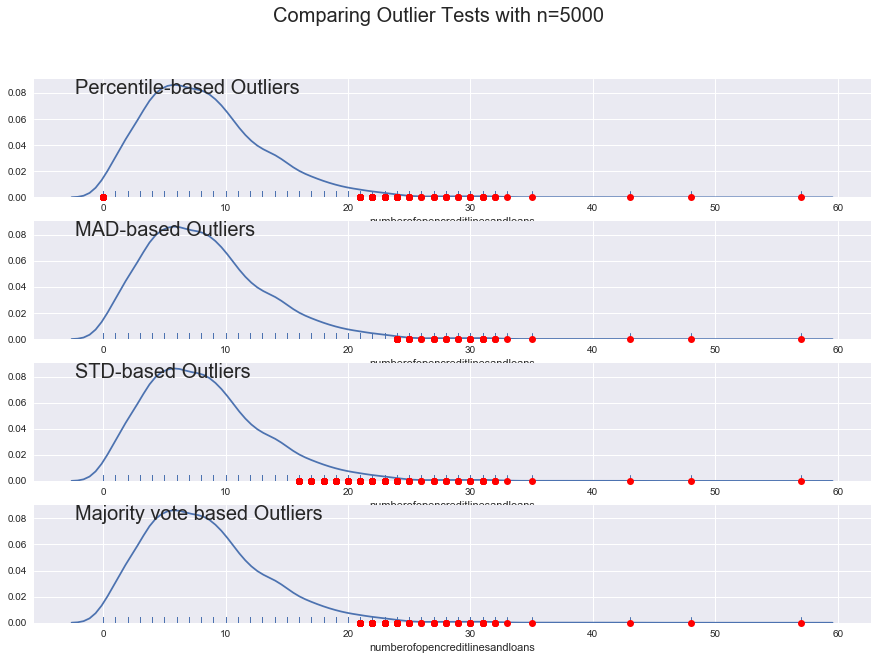

In [66]:
plotOutlier(full_data.numberofopencreditlinesandloans.sample(5000))                

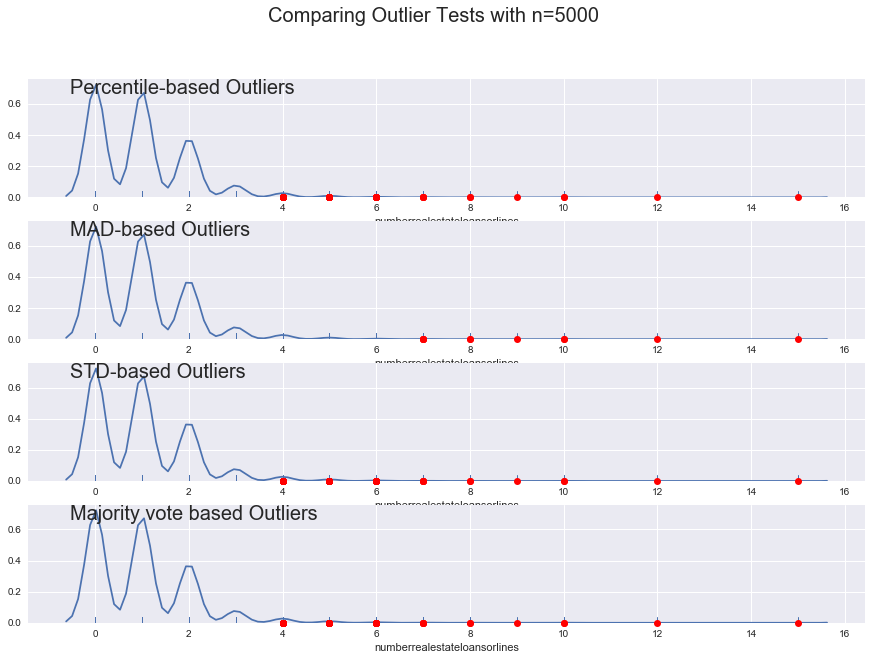

In [67]:
plotOutlier(full_data.numberrealestateloansorlines.sample(5000))                

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


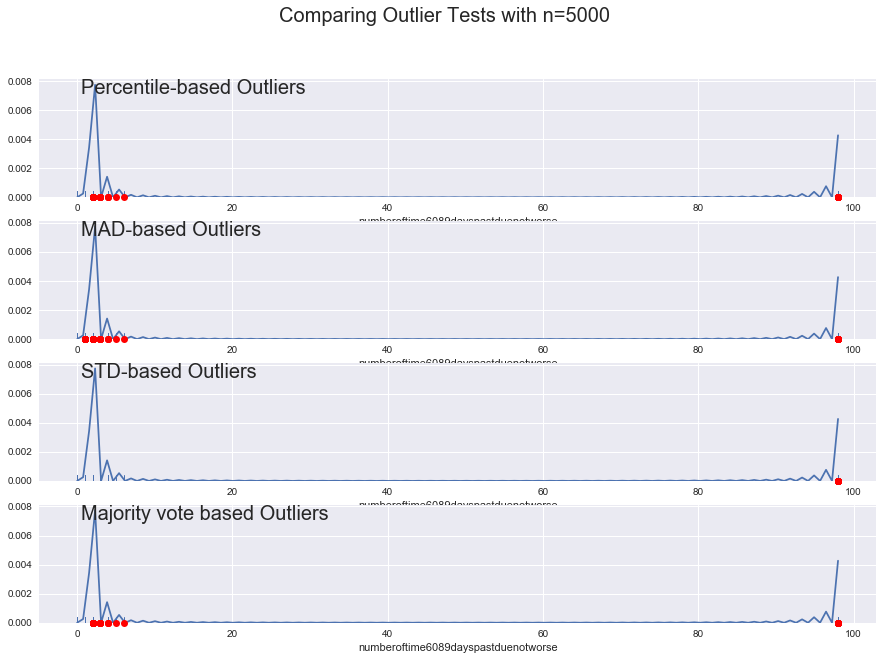

In [68]:
plotOutlier(full_data.numberoftime6089dayspastduenotworse.sample(5000))                

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


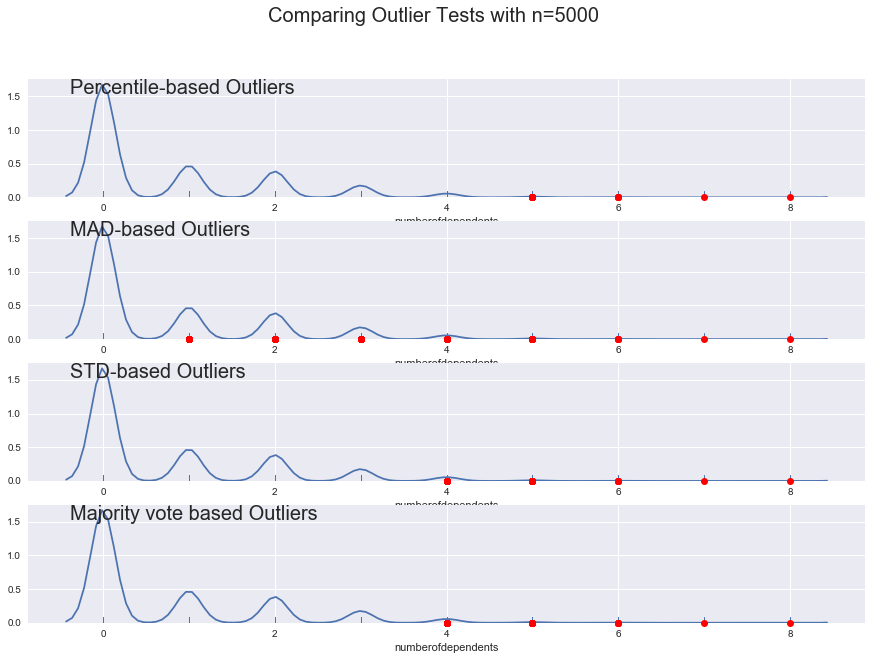

In [69]:
plotOutlier(full_data.numberofdependents.sample(5000))                

# Handling outliers

In [17]:
revnew = []
for val in full_data.revolvingutilizationofunsecuredlines:
    if(val <= 0.99999):
        revnew.append(val)
    else:
        revnew.append(0.99999)

full_data.revolvingutilizationofunsecuredlines = revnew
    

In [18]:
import collections
collections.Counter(full_data.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

In [19]:
new_age = []
for val in full_data.age:
    if(val>21):
        new_age.append(val)
    else:
        new_age.append(21)
full_data.age = new_age

In [20]:
collections.Counter(full_data.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [21]:
New = []
med = full_data.numberoftime3059dayspastduenotworse.median()
for val in full_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

full_data.numberoftime3059dayspastduenotworse = New

In [29]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(full_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

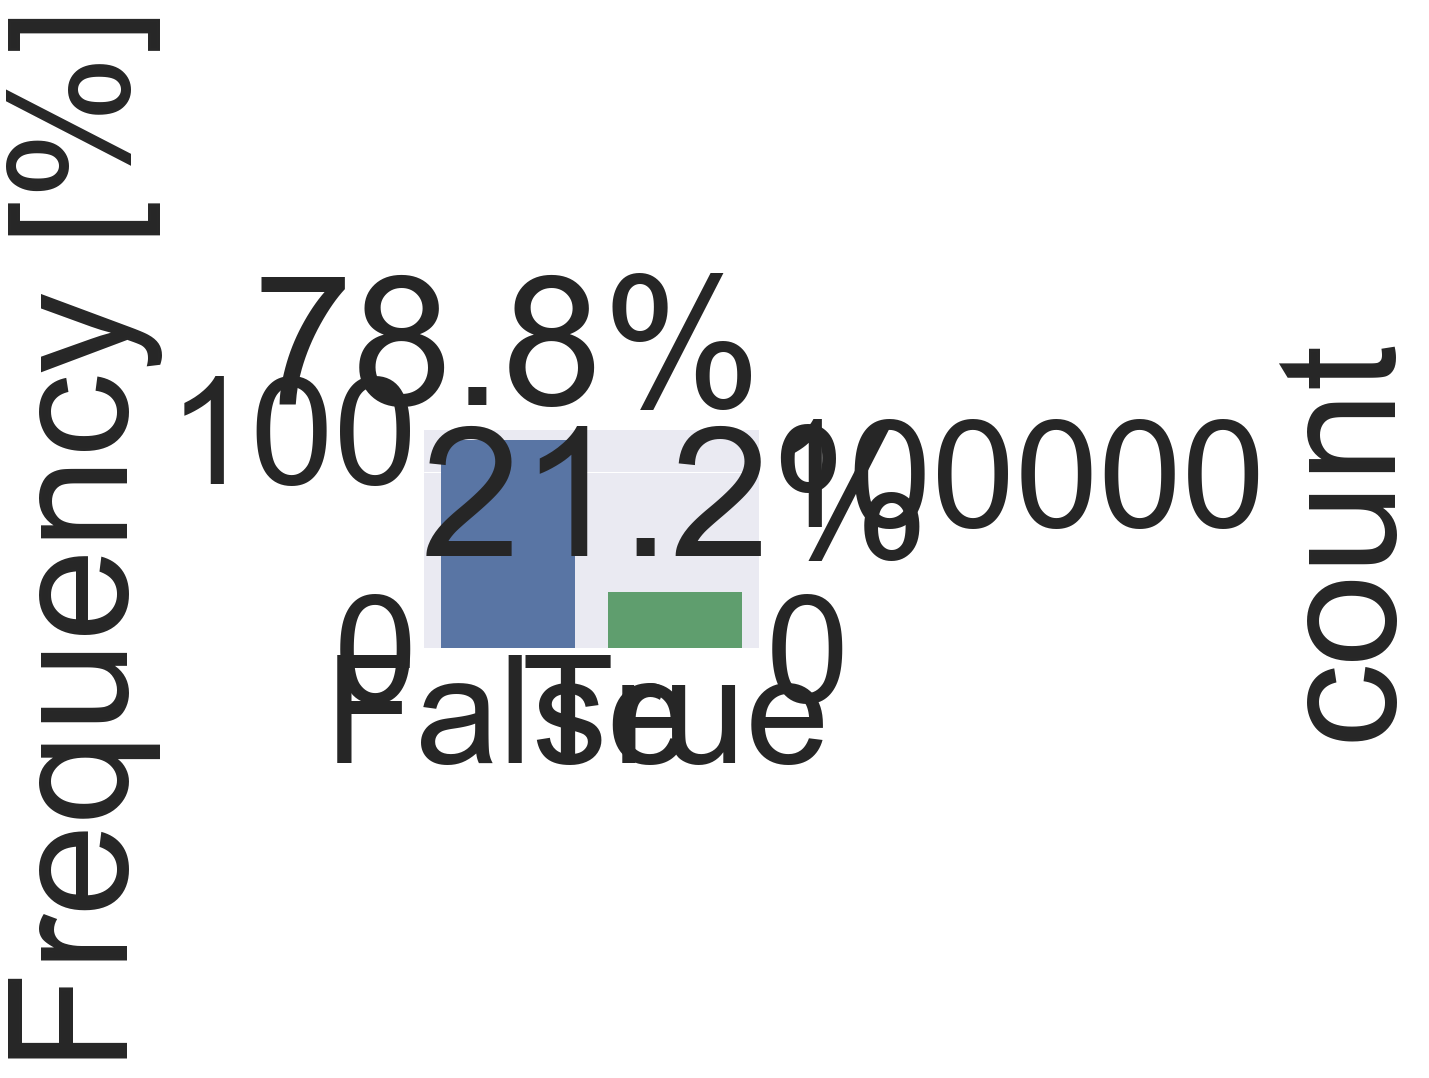

In [31]:
def add_freq():
    ncount = len(full_data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sb.countplot(mad_based_outlier(full_data.debtratio))

add_freq()

In [32]:
minUpperBound = min([val for (val, out) in zip(full_data.debtratio, mad_based_outlier(full_data.debtratio)) if out == True])

In [33]:
new_debt = []
for val in full_data.debtratio:
    if(val > minUpperBound):
        new_debt.append(minUpperBound)
    else:
        new_debt.append(val)
full_data.debtratio = new_debt

In [34]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(list(zip(data, vote)), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [35]:
new_income = replaceOutlier(full_data.monthlyincome)
full_data.monthlyincome = new_income

In [36]:
collections.Counter(full_data.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [37]:
def replaceWithMed(data,num1 = 96,num2 = 98):
    new_data = []
    for val in data:
        if(val == num1 | val == num2):
            new_data.append(data.median())
        else:
            new_data.append(val)
    return new_data

In [38]:
full_data.numberoftimes90dayslate = replaceWithMed(full_data.numberoftimes90dayslate)

In [39]:
collections.Counter(full_data.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [40]:
realNew = []
for val in full_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
full_data.numberrealestateloansorlines = realNew

In [41]:
collections.Counter(full_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [42]:
full_data.numberoftime6089dayspastduenotworse = replaceWithMed(full_data.numberoftime6089dayspastduenotworse)

In [43]:
collections.Counter(full_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [44]:
depNew = []
for var in full_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
full_data.numberofdependents = depNew

# Feature Importance

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
full_data = full_data.sample(n=50000)

In [48]:
X = full_data.drop('seriousdlqin2yrs', axis=1)
y = full_data.seriousdlqin2yrs

labels = full_data.columns[1:]

forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, labels[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.181634
 2) age                            0.147468
 3) numberoftime3059dayspastduenotworse 0.147421
 4) debtratio                      0.142573
 5) monthlyincome                  0.100918
 6) numberofopencreditlinesandloans 0.091858
 7) numberoftimes90dayslate        0.054650
 8) numberrealestateloansorlines   0.046518
 9) numberoftime6089dayspastduenotworse 0.046300
10) numberofdependents             0.040659


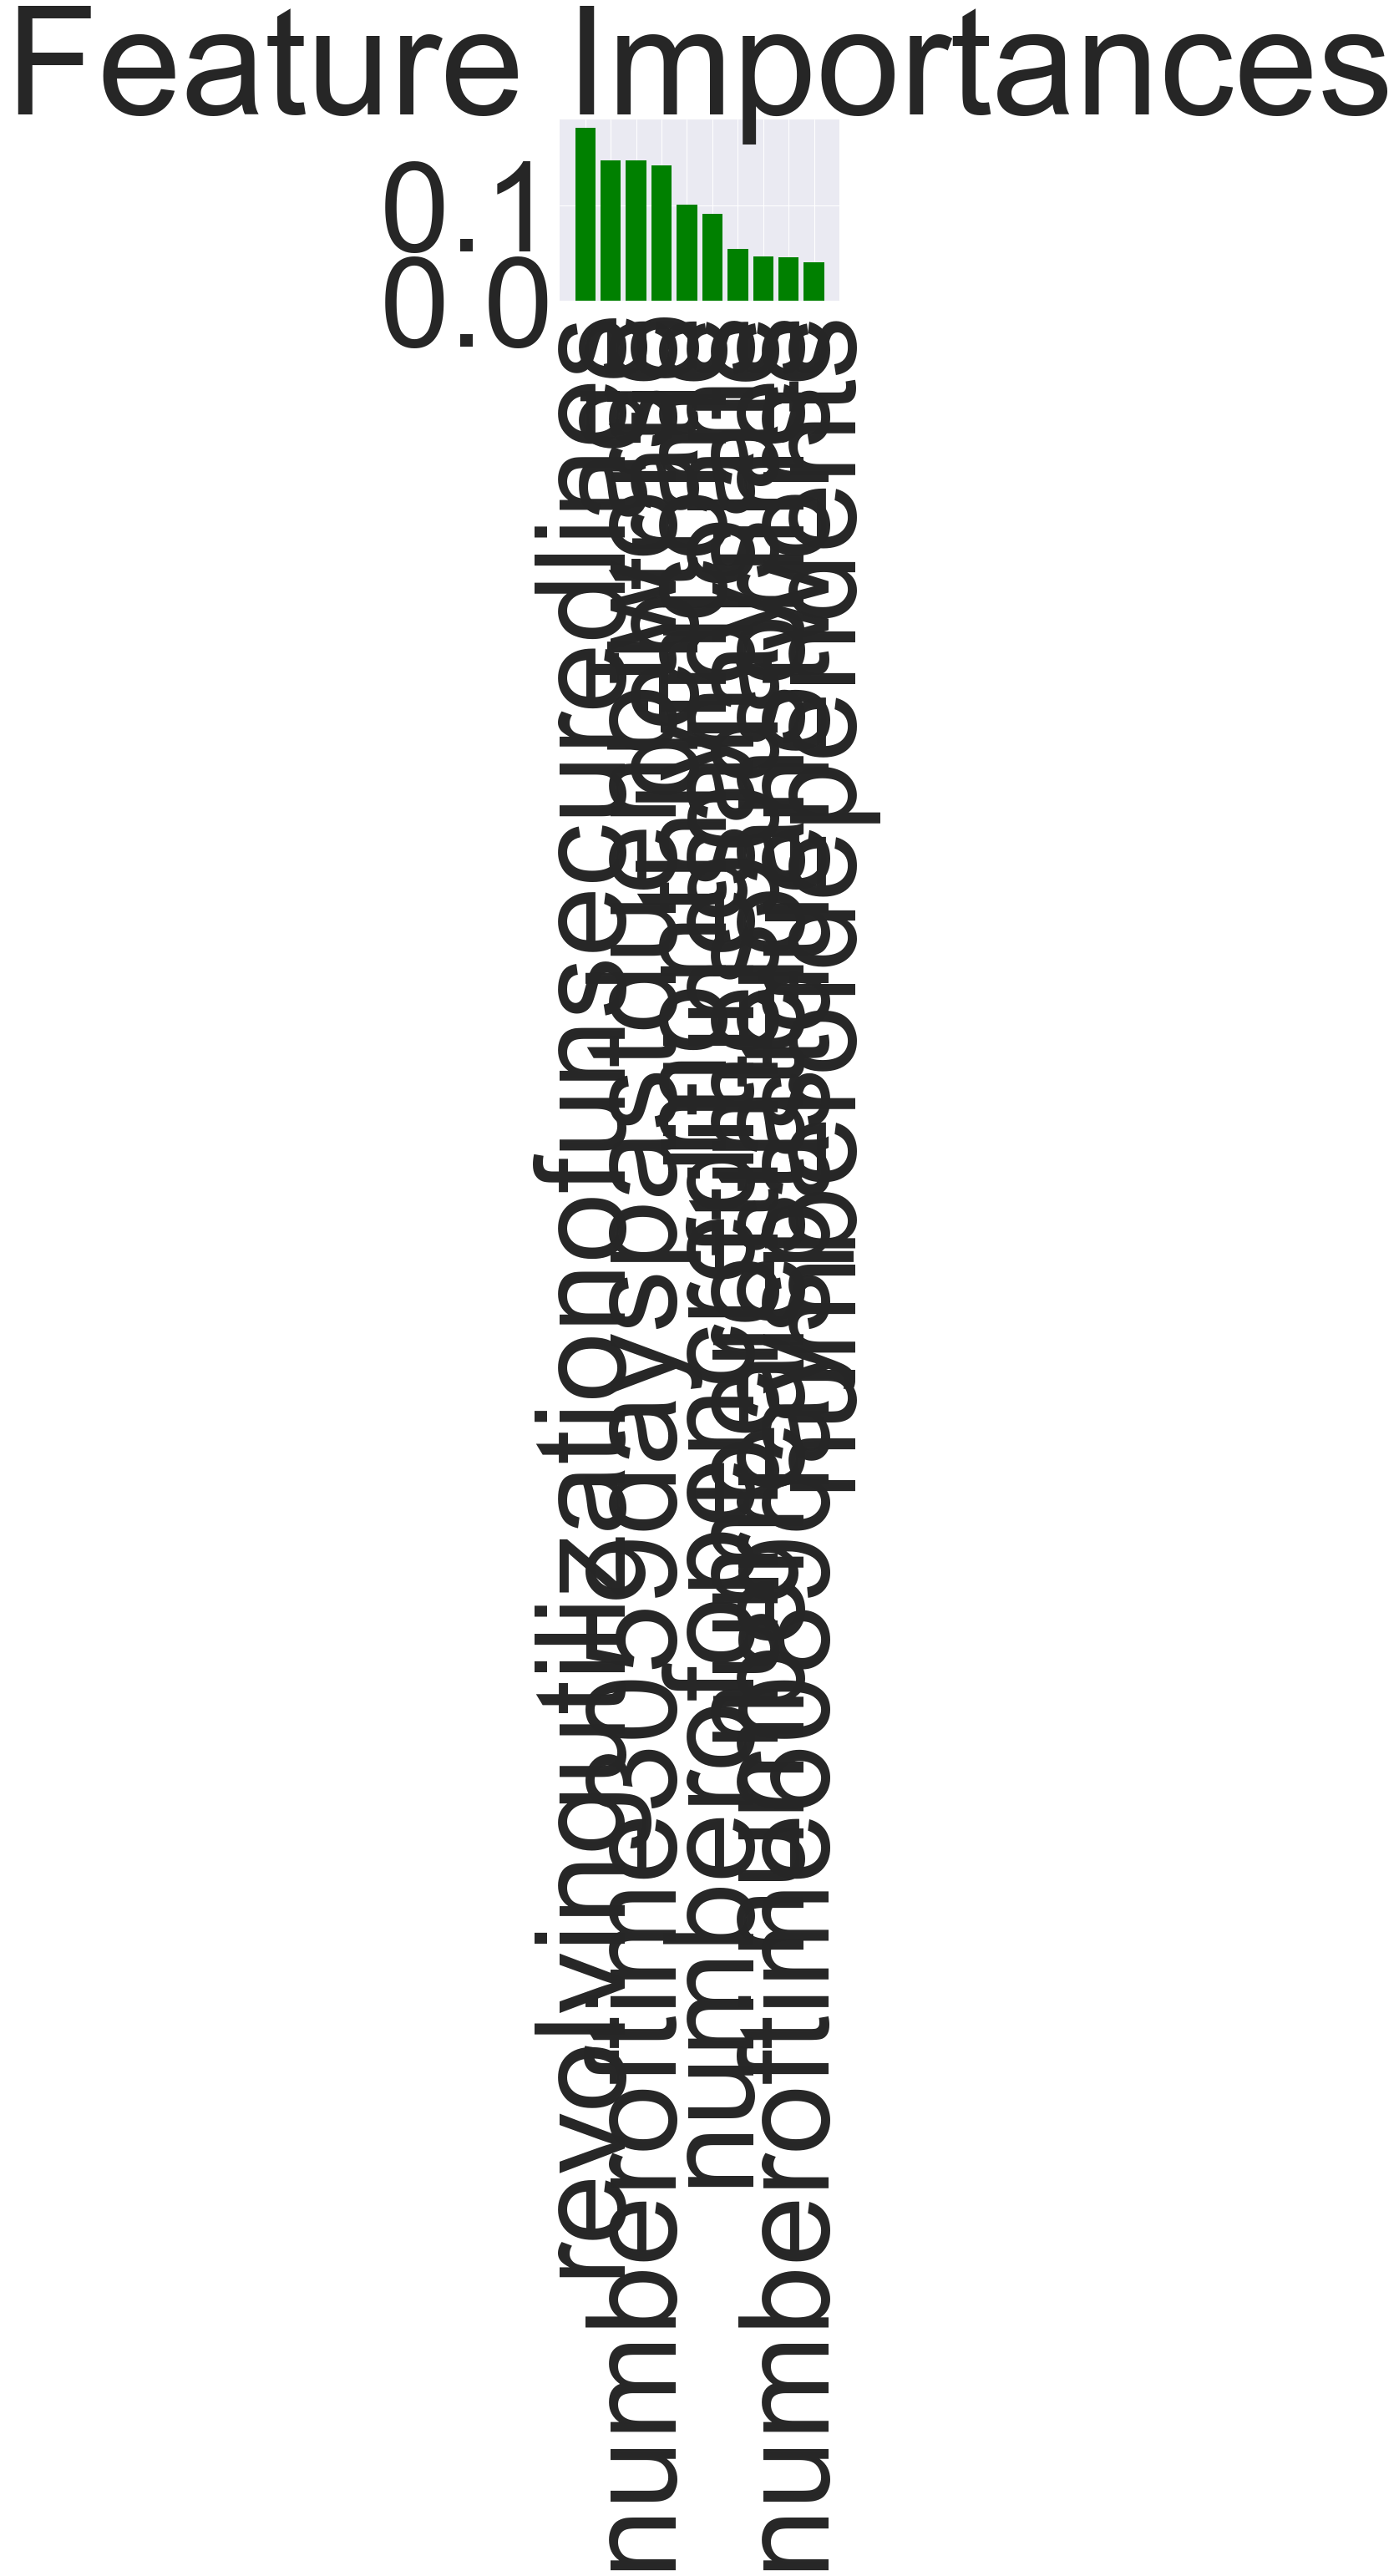

In [51]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Train and Build Base Line Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Hyperparameter Tuning and building the model

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
param_grid = {'n_neighbors' : [i for i in range(50) if i%2 !=0 ]}

In [60]:
estimator = KNeighborsClassifier()

In [61]:
gridSearchAda = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_neighbors=45 ..................................................
[CV] ................................... n_neighbors=45, total=   0.8s
[CV] n_neighbors=45 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ................................... n_neighbors=45, total=   0.6s
[CV] n_neighbors=45 ..................................................
[CV] ................................... n_neighbors=45, total=   0.5s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.4s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.4s
[CV] n_neighbors=21 ..................................................
[CV] ................................... n_neighbors=21, total=   0.4s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.3s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.3s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   18.0s finished


In [62]:
gridSearchAda.best_params_, gridSearchAda.best_score_


({'n_neighbors': 45}, 0.6404706082768326)

In [64]:
Knn_model = KNeighborsClassifier(n_neighbors = 45)
Knn_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=45, p=2,
           weights='uniform')

In [66]:
roc_auc_score(y_test,Knn_model.predict_proba(np.array(X_test.values))[:,1])

0.7627232292200035

# Logistic Regression

In [67]:
param_grids = {"penalty":['l1','l2'],"C":[0.1,0.01,0.001,0.0001,5,10,100,1000]}

In [68]:
estimator = LogisticRegression()

In [69]:
gridSearchAda = RandomizedSearchCV(estimator=estimator, param_distributions=param_grids, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   2.0s
[CV] penalty=l1, C=10 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ................................. penalty=l1, C=10, total=   0.3s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.2s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   0.4s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   0.3s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   0.3s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   0.3s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   0.2s
[CV] penalty=l1, C=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.9s finished


In [70]:
gridSearchAda.best_params_, gridSearchAda.best_score_


({'penalty': 'l1', 'C': 10}, 0.8519134138026633)

In [71]:
lr_model = LogisticRegression(penalty = 'l1',C = 10)

In [72]:
lr_model.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
roc_auc_score(y_test,lr_model.predict_proba(np.array(X_test.values))[:,1])

0.8457777095067417

# Ada Boost 

In [75]:
ada_model = AdaBoostClassifier()

In [79]:
param_grid = {'n_estimators':[10,50,100,200,400]}

In [80]:
AdaParams = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.5s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.5s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.3s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.1s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  12.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   8.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.1min finished


In [81]:
AdaParams.best_params_, AdaParams.best_score_


({'n_estimators': 50}, 0.8544394605439972)

In [82]:
ada_boost = AdaBoostClassifier(n_estimators = 50)

In [83]:
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [84]:
roc_auc_score(y_test,ada_boost.predict_proba(np.array(X_test.values))[:,1])

0.8480320873869261

# Random Forest Classifier

In [86]:
random_forest = RandomForestClassifier()

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
random_forest_search = RandomizedSearchCV(estimator=random_forest, param_distributions=random_grid, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total= 2.5min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total= 1.8min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total= 2.7min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.7min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total= 3.8min
[CV] n_estimator

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 26.3min finished


In [90]:
random_forest_search.best_params_,random_forest_search.best_score_

({'n_estimators': 1600,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': None,
  'bootstrap': True},
 0.8584276319863241)

In [92]:
params_forest = {'n_estimators': 1600,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': None,
  'bootstrap': True}

In [96]:
random_forest = RandomForestClassifier(n_estimators = 1600,min_samples_split = 40,min_samples_leaf =40,max_features='auto',bootstrap = True)

In [97]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
roc_auc_score(y_test,random_forest.predict_proba(np.array(X_test.values))[:,1])

0.8531223416965351

# Gradient Boosting

In [103]:
grad_algo = GradientBoostingClassifier()